<a href="https://colab.research.google.com/github/SharonAzubuike/DataScienceProject/blob/main/sharon_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Section 1: Exploratory Data Analysis**

The data set (cardiovascular.csv) has ten features and 461 rows. The goal of our study is to find the correlation between alcohol consumption, systolic blood pressure, obesity and age with chronic heart disease (chd).
To begin, we would first import the data, and have a quick look at what our data is all about.

In [23]:
cardio_1 = pd.read_csv('cardiovascular.csv')
# since ind is in the dataset, we have to drop the column to let pandas naturally select the index
# index is just like the row count
cardio_1 = pd.read_csv('cardiovascular.csv', delimiter = ';', index_col = 'ind')
cardio_1.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [24]:
cardio_1 = pd.read_csv('cardiovascular.csv', delimiter = ';', index_col = 'ind')
# Dropping the 'ind' column and letting pandas select the index
cardio_1 = cardio_1.reset_index(drop=True)
cardio_1.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [31]:
cardio_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [25]:
cardio_1.tail()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [81]:
cardio_1 = pd.read_csv('cardiovascular.csv', delimiter = ';', index_col = 'ind')
# Dropping the 'ind' column and letting pandas select the index
cardio_1 = cardio_1.reset_index(drop=True)
cardio_1.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [79]:
from pandas.core.frame import DataFrame


In [27]:
print(cardio_1.shape)
cardio_1.describe()

(462, 10)


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


We would like to explore our data by grouping the data into segments of age, family history and chd

In [82]:
cardio_1.groupby(['age']).count()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,chd
age,,,,,,,,,
15,3,3,3,3,3,3,3,3,3
16,20,20,20,20,20,20,20,20,20
17,17,17,17,17,17,17,17,17,17
18,8,8,8,8,8,8,8,8,8
19,2,2,2,2,2,2,2,2,2
20,6,6,6,6,6,6,6,6,6
21,3,3,3,3,3,3,3,3,3
23,2,2,2,2,2,2,2,2,2
24,6,6,6,6,6,6,6,6,6


In [83]:
cardio_1.groupby(['famhist']).count()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
famhist,,,,,,,,,
Absent,270,270,270,270,270,270,270,270,270
Present,192,192,192,192,192,192,192,192,192


In [84]:
cardio_1.groupby(['chd']).count()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
chd,,,,,,,,,
0,302,302,302,302,302,302,302,302,302
1,160,160,160,160,160,160,160,160,160


The code below groups the systolic blood pressure of the patients based on the age description from 15 to 45. And from the result below, we see that there is an increase in systolic blood pressure with increasing age.

In [85]:
cardio_1.groupby(['age']).describe()["sbp"]

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15,3.0,123.333333,7.571878,118.0,119.00,120.0,126.00,132.0
16,20.0,122.000000,10.997607,101.0,114.00,120.0,133.00,138.0
17,17.0,128.176471,9.567100,114.0,120.00,128.0,132.00,154.0
18,8.0,127.375000,17.557558,103.0,119.50,122.0,135.00,162.0
19,2.0,131.000000,4.242641,128.0,129.50,131.0,132.50,134.0
20,6.0,118.000000,8.763561,106.0,111.00,122.0,124.00,126.0
21,3.0,134.000000,16.370706,116.0,127.00,138.0,143.00,148.0
23,2.0,127.000000,4.242641,124.0,125.50,127.0,128.50,130.0
24,6.0,134.333333,9.416298,122.0,129.50,135.0,136.00,150.0


In [86]:
cardio_1.groupby(['age']).describe()["tobacco"]

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15,3.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
16,20.0,0.040500,0.109567,0.00,0.0000,0.000,0.0125,0.48
17,17.0,0.044706,0.090493,0.00,0.0000,0.000,0.0200,0.31
18,8.0,0.025000,0.042762,0.00,0.0000,0.000,0.0350,0.12
19,2.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
20,6.0,0.685000,0.824251,0.00,0.0225,0.350,1.3600,1.80
21,3.0,0.343333,0.594671,0.00,0.0000,0.000,0.5150,1.03
23,2.0,0.080000,0.113137,0.00,0.0400,0.080,0.1200,0.16
24,6.0,0.581667,0.796955,0.00,0.0100,0.160,1.0900,1.81


In [ ]:
cardio_1.groupby(['typea']).describe()["sbp"]

,count,mean,std,min,25%,50%,75%,max
typea,,,,,,,,
13,1.0,154.000000,NaN,154.0,154.0,154.0,154.0,154.0
20,1.0,130.000000,NaN,130.0,130.0,130.0,130.0,130.0
25,1.0,126.000000,NaN,126.0,126.0,126.0,126.0,126.0
26,1.0,114.000000,NaN,114.0,114.0,114.0,114.0,114.0
28,1.0,152.000000,NaN,152.0,152.0,152.0,152.0,152.0
29,1.0,162.000000,NaN,162.0,162.0,162.0,162.0,162.0
30,2.0,144.000000,0.000000,144.0,144.0,144.0,144.0,144.0
31,2.0,146.000000,19.798990,132.0,139.0,146.0,153.0,160.0
32,1.0,166.000000,NaN,166.0,166.0,166.0,166.0,166.0


Data Selection

## 1.1 Select following columns of cardio_1: age and family history
##cardio_1[["age", "famhist"]]


## 1.2 Filter them to show those who are younger than the Age 40
##cardio_1[cardio_1["Age"]>40]

## 2. Return the rows of cardio_1 where Chd is 1
##cardio_1[(cardio_1["chd"] == "1") | (cardio_1["chd"] == "1")]

## 3. Return the cardio_1 data frame rows where the Age is between 20 and 50
##cardio_1[(cardio_1["Age"]>20) & (cardio_1["Age"]< 60)]

In [32]:
cardio_1[["age", "famhist"]]

,age,famhist
0,52,Present
1,63,Absent
2,46,Present
3,58,Present
4,49,Present
...,...,...
457,58,Absent
458,52,Absent
459,55,Absent
460,40,Absent


In [34]:
cardio_1[cardio_1["age"]>40]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
456,170,0.40,4.11,42.06,Present,56,33.10,2.06,57,0
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0


from matplotlib import pyplot as plt
_df_0['sbp'].plot(kind='hist', bins=20, title='sbp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tobacco'].plot(kind='hist', bins=20, title='tobacco')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ldl'].plot(kind='hist', bins=20, title='ldl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['adiposity'].plot(kind='hist', bins=20, title='adiposity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('famhist').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sbp', y='tobacco', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='tobacco', y='ldl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='ldl', y='adiposity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='adiposity', y='typea', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['sbp'].plot(kind='line', figsize=(8, 4), title='sbp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['tobacco'].plot(kind='line', figsize=(8, 4), title='tobacco')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['ldl'].plot(kind='line', figsize=(8, 4), title='ldl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['adiposity'].plot(kind='line', figsize=(8, 4), title='adiposity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['famhist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='sbp', y='famhist', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['famhist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='tobacco', y='famhist', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['famhist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='ldl', y='famhist', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['famhist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='adiposity', y='famhist', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [36]:
cardio_1[(cardio_1["chd"] == 1) | (cardio_1["chd"] == 1)]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
...,...,...,...,...,...,...,...,...,...,...
453,124,1.60,7.22,39.68,Present,36,31.50,0.00,51,1
454,146,0.64,4.82,28.02,Absent,60,28.11,8.23,39,1
455,128,2.24,2.83,26.48,Absent,48,23.96,47.42,27,1
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1


In [37]:
cardio_1[(cardio_1["sbp"] > 120) | (cardio_1["sbp"] > 120)]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
...,...,...,...,...,...,...,...,...,...,...
455,128,2.24,2.83,26.48,Absent,48,23.96,47.42,27,1
456,170,0.40,4.11,42.06,Present,56,33.10,2.06,57,0
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1


In [38]:
cardio_1[(cardio_1["ldl"] > 7) | (cardio_1["ldl"] > 7)]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
16,120,7.50,15.33,22.00,Absent,60,25.31,34.49,49,0
17,146,10.50,8.29,35.36,Present,78,32.73,13.89,53,1
18,158,2.60,7.46,34.07,Present,61,29.30,53.28,62,1
25,124,4.00,12.42,31.29,Present,54,23.23,2.06,42,1
26,118,6.00,9.65,33.91,Absent,60,38.80,0.00,48,0
...,...,...,...,...,...,...,...,...,...,...
426,142,1.32,7.63,29.98,Present,57,31.16,72.93,33,0
440,110,0.00,7.14,28.28,Absent,57,29.00,0.00,32,0
442,166,6.00,8.80,37.89,Absent,39,28.70,43.20,52,0
453,124,1.60,7.22,39.68,Present,36,31.50,0.00,51,1


In [52]:
cardio_7 = cardio_1[(cardio_1["ldl"] > 7) & (cardio_1["famhist"] == "Present") & (cardio_1["chd"] == 1)]
print(cardio_7)

     sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
17   146    10.50   8.29      35.36  Present     78    32.73    13.89   53   
18   158     2.60   7.46      34.07  Present     61    29.30    53.28   62   
25   124     4.00  12.42      31.29  Present     54    23.23     2.06   42   
46   162     7.40   8.55      24.65  Present     64    25.71     5.86   58   
47   116     1.91   7.56      26.45  Present     52    30.01     3.60   33   
80   114     3.00   7.04      22.64  Present     55    22.59     0.00   45   
98   122     3.20  11.32      35.36  Present     55    27.07     0.00   51   
111  168     9.00   8.53      24.48  Present     69    26.18     4.63   54   
113  174     0.00   8.46      35.10  Present     35    25.27     0.00   61   
125  123     8.60  11.17      35.28  Present     70    33.14     0.00   59   
135  122     4.18   9.05      29.27  Present     44    24.05    19.34   52   
167  160     1.52   8.12      29.30  Present     54    25.87    

In [88]:
cardio_9 = cardio_1[(cardio_1["age"]>20) & (cardio_1["age"]< 60)]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [53]:
cardio_7.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0
mean,142.185185,4.215926,8.581111,30.237778,56.592593,27.740741,12.046667,49.666667,1.0
std,22.857480,2.936647,1.619193,4.841819,11.695690,3.239631,18.640958,10.049876,0.0
min,112.000000,0.000000,7.020000,19.990000,35.000000,22.590000,0.000000,26.000000,1.0
25%,123.500000,1.795000,7.395000,26.940000,49.000000,25.790000,0.000000,44.000000,1.0
50%,136.000000,4.000000,8.280000,29.300000,56.000000,27.290000,4.630000,52.000000,1.0
75%,160.000000,6.600000,8.800000,34.780000,66.000000,29.120000,14.145000,58.000000,1.0
max,198.000000,10.500000,12.420000,39.680000,78.000000,36.460000,78.990000,64.000000,1.0


In [ ]:
cardio_1.isnull()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
457,False,False,False,False,False,False,False,False,False,False
458,False,False,False,False,False,False,False,False,False,False
459,False,False,False,False,False,False,False,False,False,False
460,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(cardio_1.isnull().sum())

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


In [ ]:
cardio_2= cardio_1.duplicated().sum()
print(cardio_2)

0


In [ ]:
cardio_1 = cardio_1[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd']]

# Check unique values and their counts for each column
for column in cardio_1.columns:
    unique_values_counts = cardio_1[column].value_counts()
    print(f"Unique values and their counts in '{column}':")
    print(unique_values_counts)
    print()  # Print an empty line for separation


Unique values and their counts in 'sbp':
136    29
134    29
128    25
132    24
118    21
       ..
153     1
121     1
145     1
117     1
182     1
Name: sbp, Length: 62, dtype: int64

Unique values and their counts in 'tobacco':
0.00     107
6.00      11
3.00      10
0.40       8
4.00       8
        ... 
1.05       1
3.46       1
15.50      1
3.04       1
2.24       1
Name: tobacco, Length: 214, dtype: int64

Unique values and their counts in 'ldl':
4.37     5
3.95     5
3.57     5
3.58     4
2.40     4
        ..
7.95     1
6.89     1
4.91     1
4.67     1
11.61    1
Name: ldl, Length: 329, dtype: int64

Unique values and their counts in 'adiposity':
30.79    3
27.55    3
21.10    3
29.30    3
24.65    2
        ..
19.71    1
23.51    1
35.54    1
15.70    1
33.41    1
Name: adiposity, Length: 408, dtype: int64

Unique values and their counts in 'typea':
52    25
57    23
54    21
50    21
49    20
60    18
56    18
55    17
61    17
47    17
45    16
46    16
51    15
48    14
5

In [2]:
import seaborn as sns


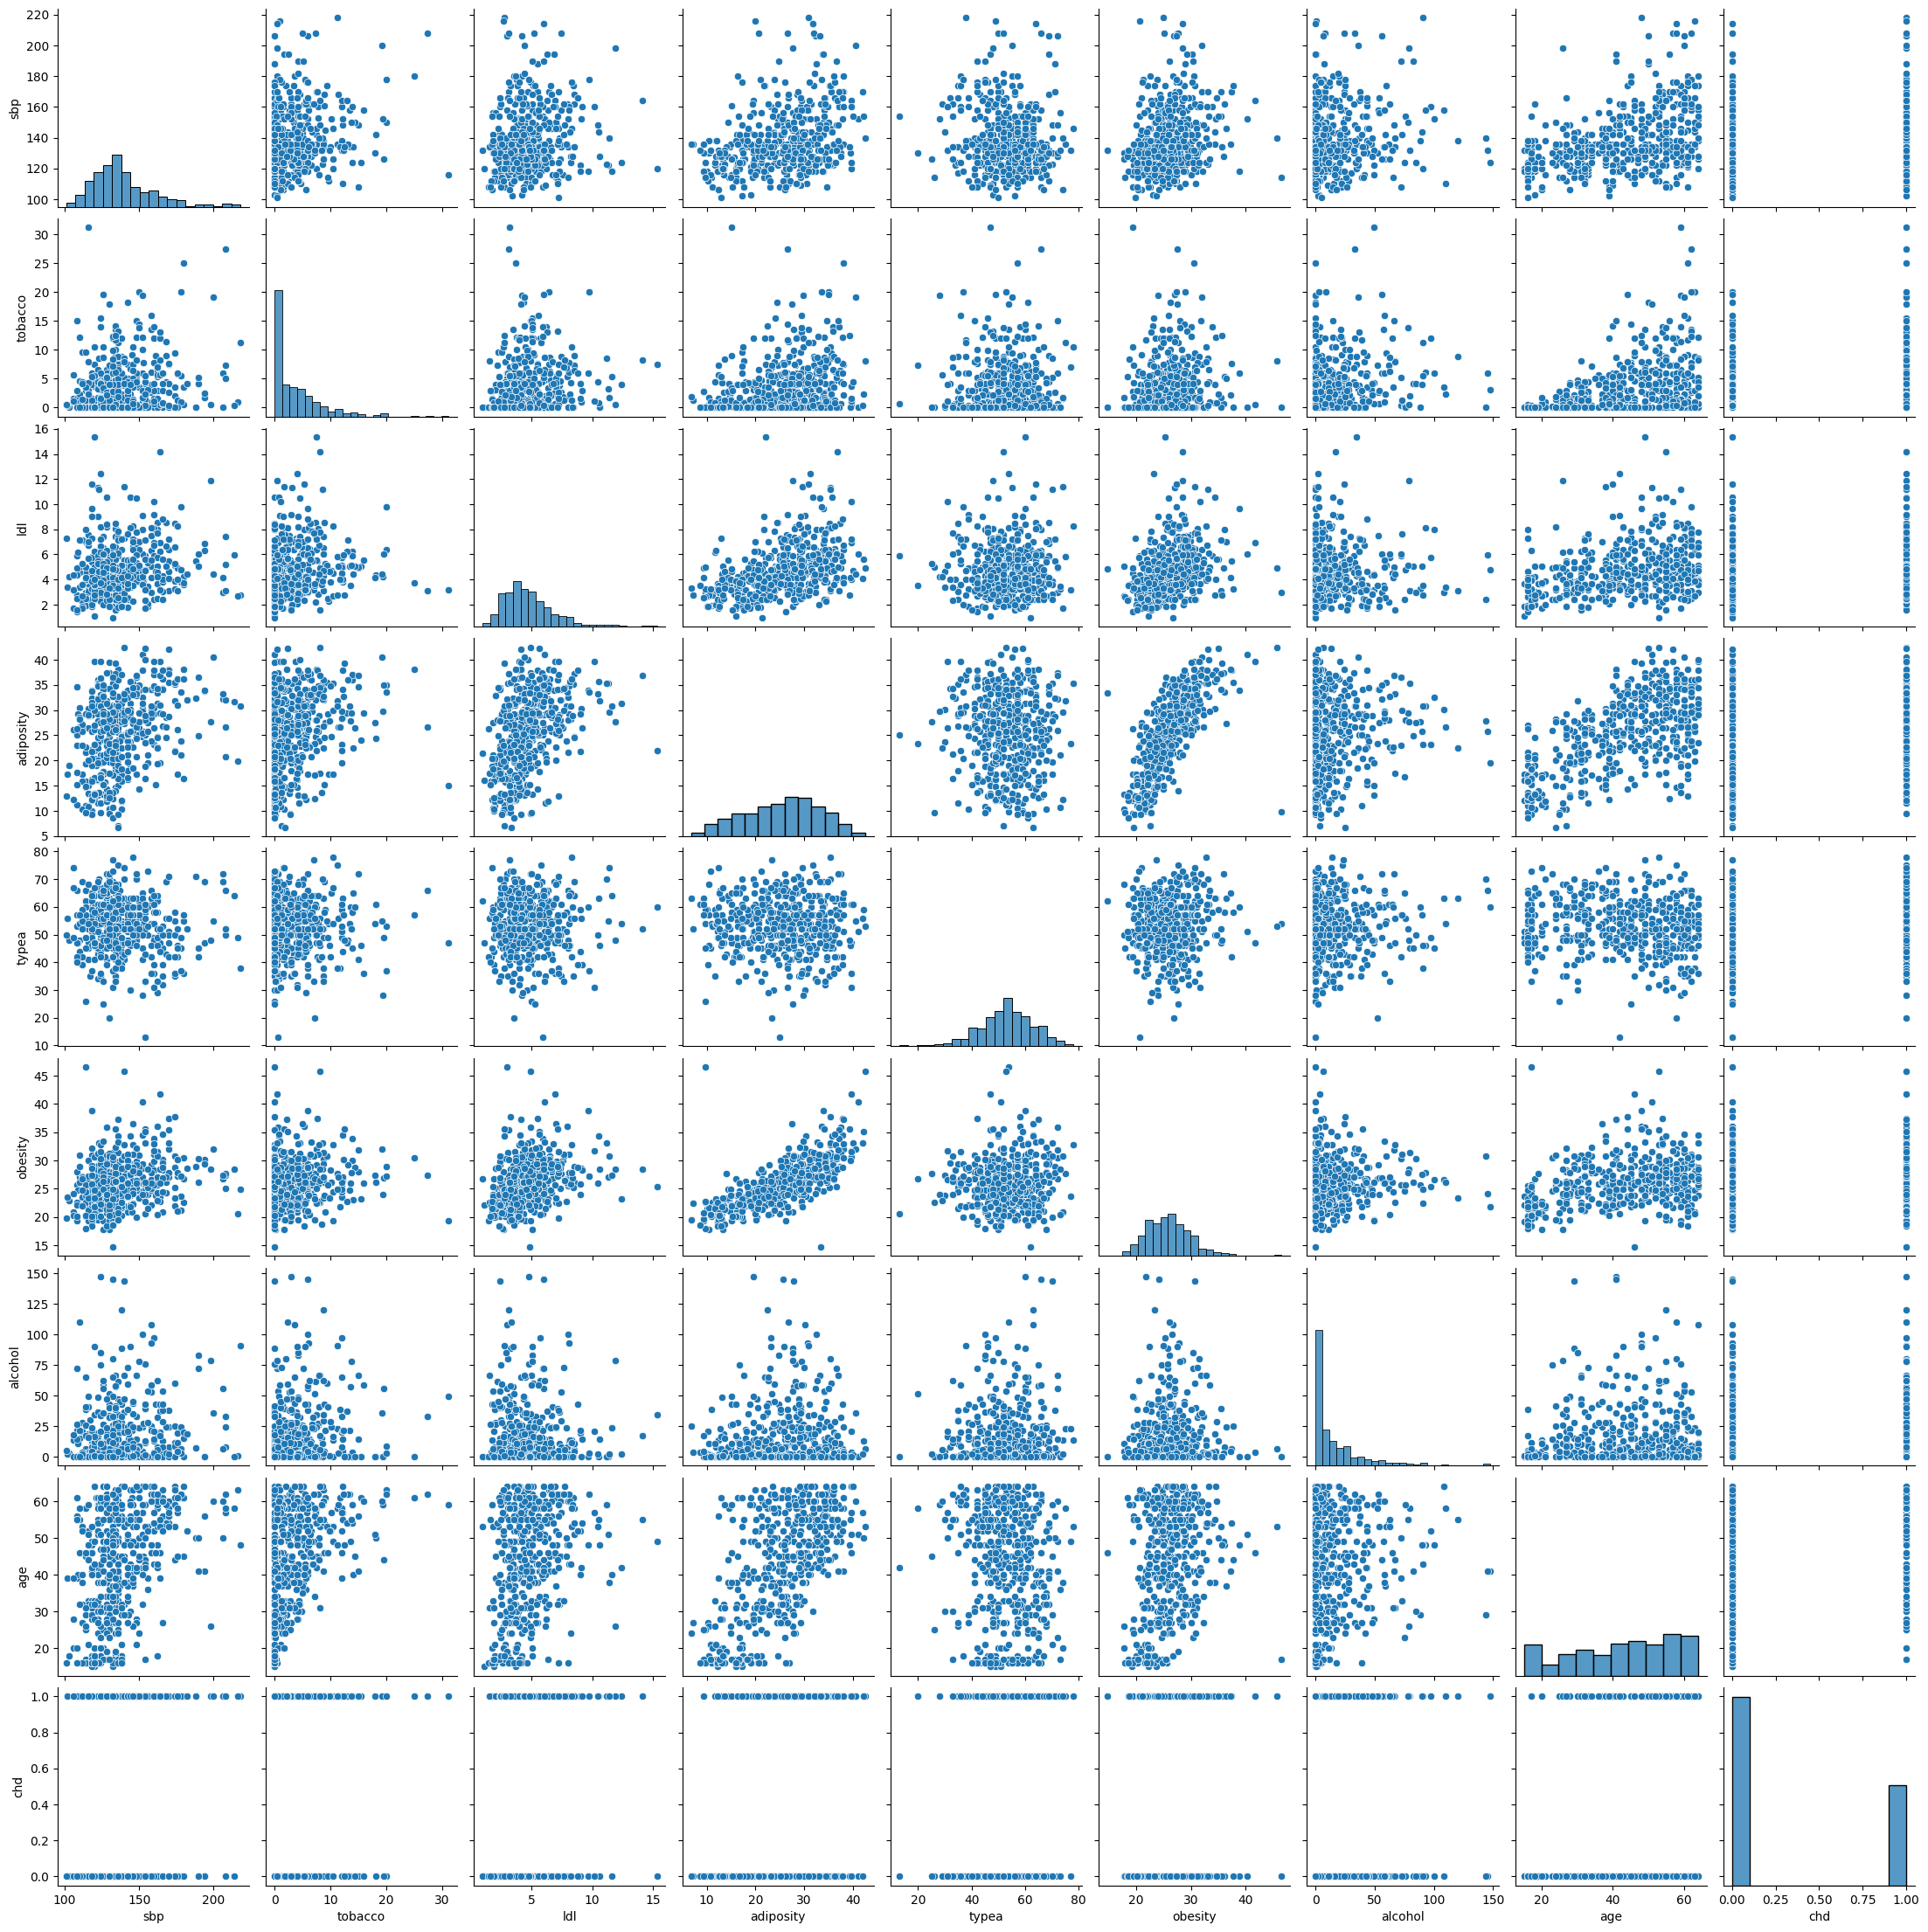

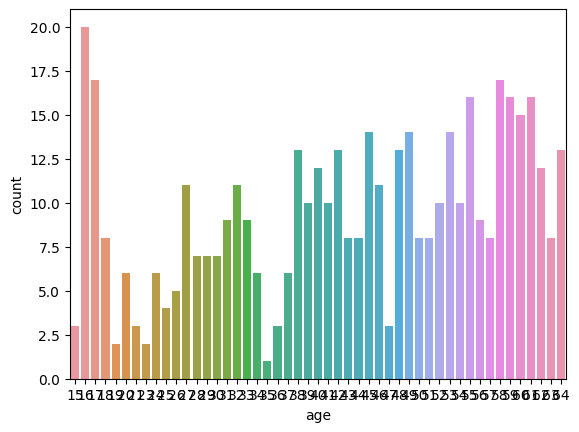

In [ ]:
# Create visualizations to understand the data distribution
sns.pairplot(cardio_1)  # Pairplot for numeric columns
plt.show()
sns.countplot(x='age', data=cardio_1)  # Countplot for categorical columns
plt.show()

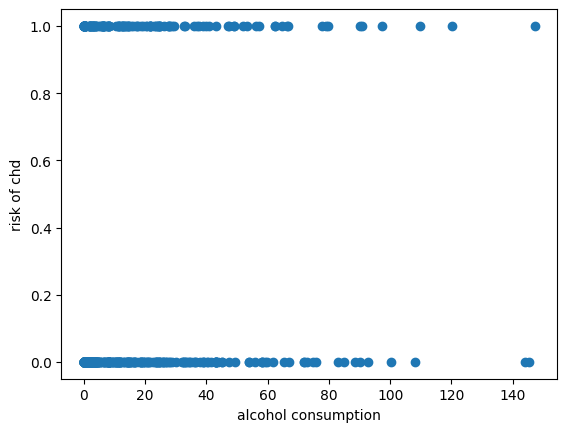

In [ ]:
plt.scatter(cardio_1['alcohol'], cardio_1['chd'])
plt.xlabel('alcohol consumption')
plt.ylabel('risk of chd');

In [ ]:
cardio_6 = cardio_1['chd'].value_counts()
print(cardio_6)
x, y = list(cardio_6.index), list(cardio_6)
x, y

0    302
1    160
Name: chd, dtype: int64


([0, 1], [302, 160])

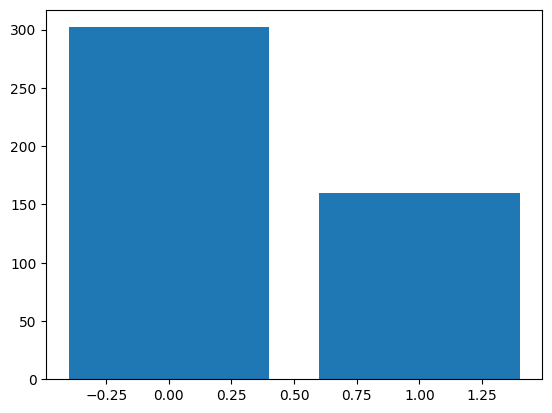

In [ ]:
plt.bar(x = x, height=y);

In [3]:
import seaborn as sns

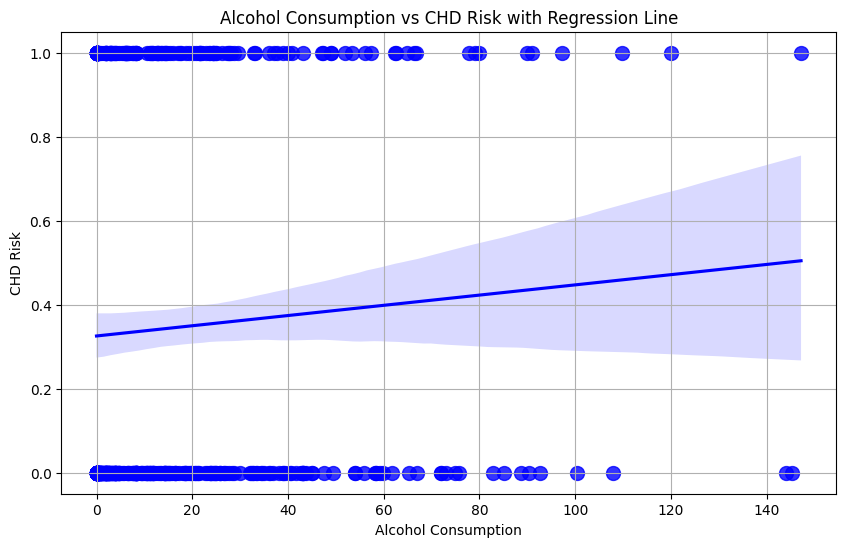

In [ ]:
cardio_6 = pd.DataFrame(cardio_1)
plt.figure(figsize=(10, 6))
sns.regplot(x='alcohol', y='chd', data=cardio_6, scatter_kws={'s': 100}, color='blue')
plt.title('Alcohol Consumption vs CHD Risk with Regression Line')
plt.xlabel('Alcohol Consumption')
plt.ylabel('CHD Risk')
plt.grid(True)
plt.show()

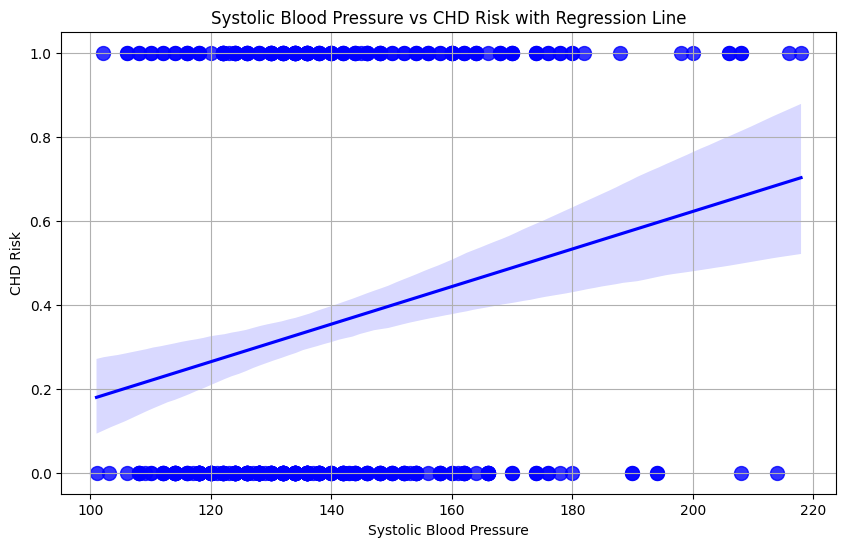

In [ ]:
cardio_6 = pd.DataFrame(cardio_1)
plt.figure(figsize=(10, 6))
sns.regplot(x='sbp', y='chd', data=cardio_6, scatter_kws={'s': 100}, color='blue')
plt.title('Systolic Blood Pressure vs CHD Risk with Regression Line')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('CHD Risk')
plt.grid(True)
plt.show()

It will be great to see the correlation between obesity and chd

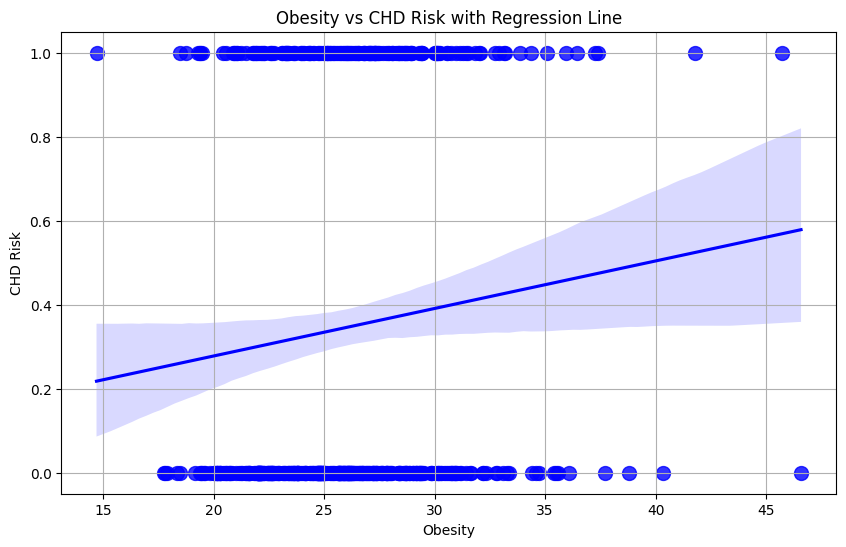

In [ ]:
cardio_6 = pd.DataFrame(cardio_1)
plt.figure(figsize=(10, 6))
sns.regplot(x='obesity', y='chd', data=cardio_6, scatter_kws={'s': 100}, color='blue')
plt.title('Obesity vs CHD Risk with Regression Line')
plt.xlabel('Obesity')
plt.ylabel('CHD Risk')
plt.grid(True)
plt.show()

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


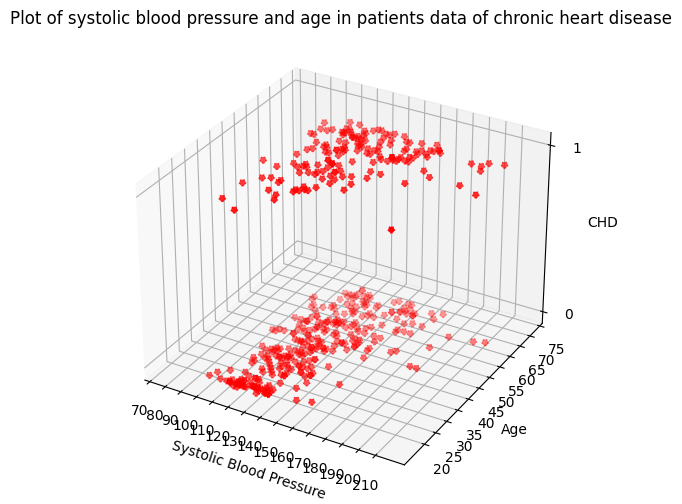

In [63]:
x = cardio_1["sbp"]
y = cardio_1["age"]
z = cardio_1["chd"]

dfx = pd.DataFrame({'sbp': x, 'age': y, 'chd': z})

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dfx['sbp'], dfx['age'], dfx['chd'], marker='o', c='r', linestyle=':')

ax.set_title('Plot of systolic blood pressure and age in patients data of chronic heart disease')
ax.set_xlabel('Systolic Blood Pressure')
ax.set_ylabel('Age')
ax.set_zlabel('CHD')

ax.set_xticks(np.arange(70, 220, 10))
ax.set_yticks(np.arange(20, 78, 5))
ax.set_zticks([0, 1])

plt.show()

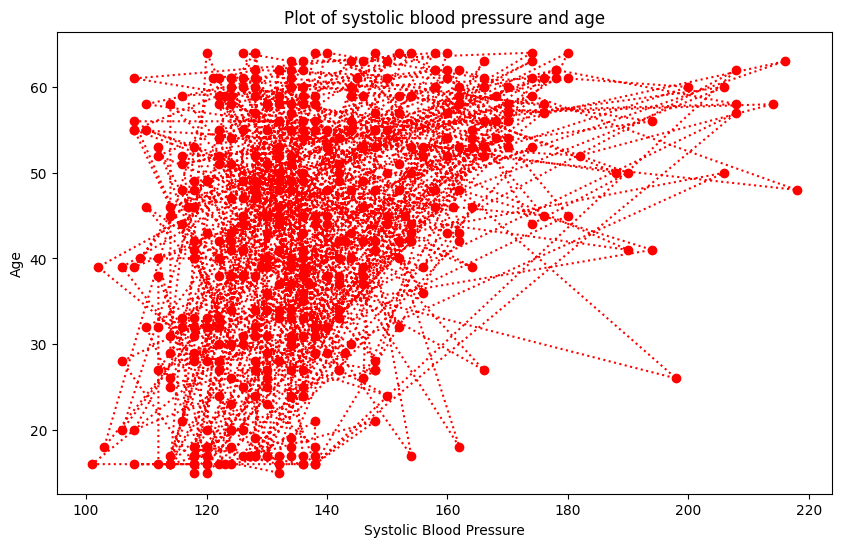

In [71]:
x = cardio_1["sbp"]
y = cardio_1["age"]

cardio_8 = pd.DataFrame({'sbp': x, 'age': y})

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cardio_8['sbp'], cardio_8['age'], marker='o', c='r', linestyle=':')
ax.set_title('Plot of systolic blood pressure and age')
ax.set_xlabel('Systolic Blood Pressure')
ax.set_ylabel('Age')
plt.show()

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

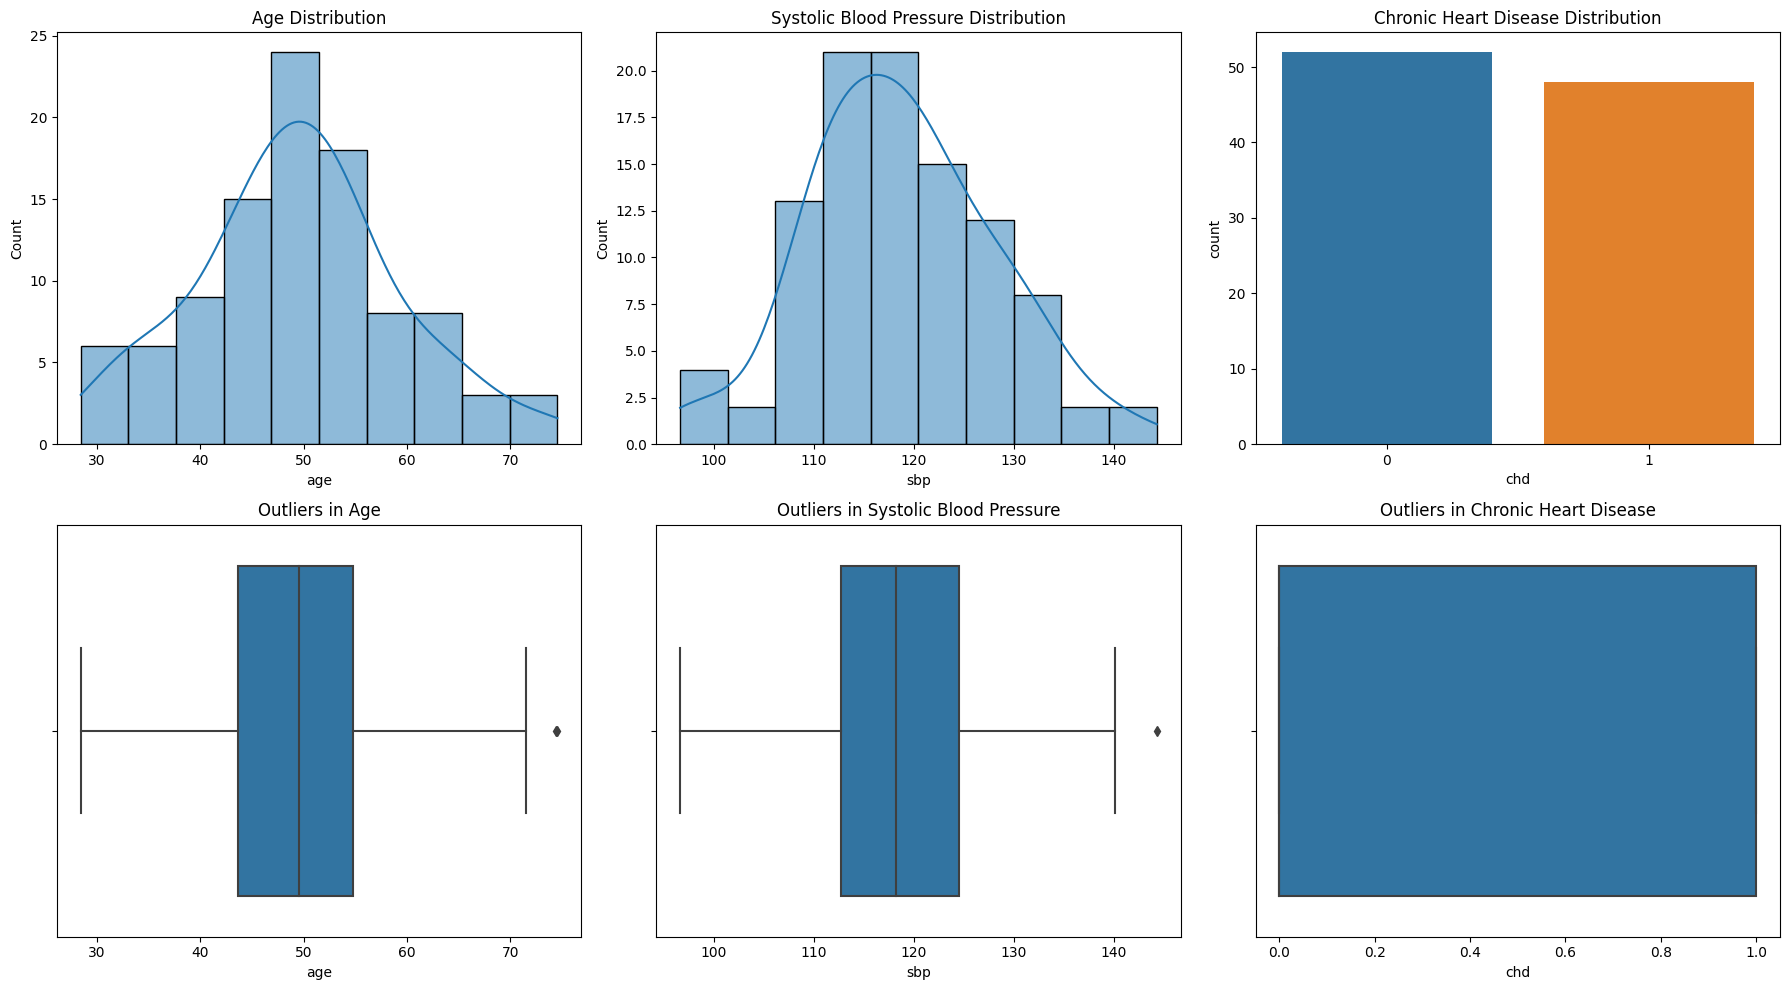

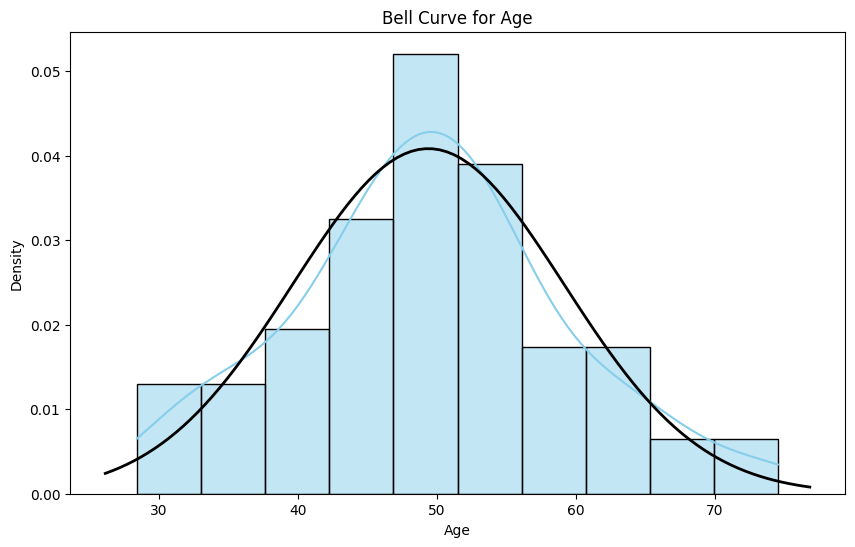

In [74]:
cardio_1 = {
    'age': np.random.normal(loc=50, scale=10, size=100),
    'sbp': np.random.normal(loc=120, scale=10, size=100),
    'chd': np.random.randint(0, 2, size=100)
}

df = pd.DataFrame(cardio_1)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Plot Age distribution
sns.histplot(df['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Plot SBP distribution
sns.histplot(df['sbp'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Systolic Blood Pressure Distribution')

# Plot CHD distribution
sns.countplot(x='chd', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Chronic Heart Disease Distribution')

# Plot outliers for Age
sns.boxplot(x=df['age'], ax=axes[1, 0])
axes[1, 0].set_title('Outliers in Age')

# Plot outliers for SBP
sns.boxplot(x=df['sbp'], ax=axes[1, 1])
axes[1, 1].set_title('Outliers in Systolic Blood Pressure')

# Plot outliers for CHD (assuming it's binary)
sns.boxplot(x=df['chd'], ax=axes[1, 2])
axes[1, 2].set_title('Outliers in Chronic Heart Disease')

# Show the overall plot
plt.tight_layout()
plt.show()

# Draw a bell curve (normal distribution) for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, stat='density', color='skyblue')
plt.title('Bell Curve for Age')
plt.xlabel('Age')
plt.ylabel('Density')

# Fit a normal distribution to the data
mu, std = norm.fit(df['age'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

In [ ]:
x = cardio_1["sbp"]
y = cardio_1["age"]
z = cardio_1["chd"]

# To do: I will like to View my data as a simple cluster

**Section 2: Data preprocessing and Feature Engineering**

In [ ]:
Q1 = cardio_1['age'].quantile(0.25)
Q3 = cardio_1['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers outside the lower and upper bounds
cardio_3 = cardio_1[(cardio_1['age'] >= lower_bound) & (cardio_1['age'] <= upper_bound)]

In [ ]:
print(cardio_3)

     sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11  Present     49    25.30    97.20   52   
1    144     0.01   4.41      28.61   Absent     55    28.87     2.06   63   
2    118     0.08   3.48      32.28  Present     52    29.14     3.81   46   
3    170     7.50   6.41      38.03  Present     51    31.99    24.26   58   
4    134    13.60   3.50      27.78  Present     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72   Absent     64    28.45     0.00   58   
458  182     4.20   4.41      32.10   Absent     52    28.61    18.72   52   
459  108     3.00   1.59      15.23   Absent     40    20.09    26.64   55   
460  118     5.40  11.61      30.79   Absent     64    27.35    23.97   40   
461  132     0.00   4.82      33.41  Present     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1

**Section 3: Model Training**

In [5]:
pip install scikit-learn

In [4]:
from sklearn.model_selection import train_test_split


In [8]:
cardio_3 = pd.read_csv('cardiovascular.csv', delimiter = ';', index_col = 'ind')
cardio_3 = cardio_3.reset_index(drop=True)
cardio_3.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


At this point, we split the data set into test and training data after which we save the split data as .csv files

In [9]:
# Specify the feature columns (independent variables) and the target column (dependent variable)
features = cardio_3[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]
target = cardio_3['chd']

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("Training set features shape:", X_train.shape)
print("Training set target shape:", y_train.shape)
print("Test set features shape:", X_test.shape)
print("Test set target shape:", y_test.shape)

Training set features shape: (369, 8)
Training set target shape: (369,)
Test set features shape: (93, 8)
Test set target shape: (93,)


In [10]:
X_train.to_csv('cardio-X-training-data.csv', index=False)

In [11]:
 #Print a message indicating that the training data has been saved
print("Training data saved to 'cardio-X-training-data.csv'")

Training data saved to 'cardio-X-training-data.csv'


In [12]:
y_train.to_csv('cardio-y-training-data.csv', index=False)

In [13]:
print("Training data saved to 'cardio-y-training-data.csv'")

Training data saved to 'cardio-y-training-data.csv'


In [14]:
X_test.to_csv('cardio-X-test-data.csv', index=False)

In [15]:
print("Training data saved to 'cardio-X-test-data.csv'")

Training data saved to 'cardio-X-test-data.csv'


In [16]:
y_test.to_csv('cardio-y-test-data.csv', index=False)

In [17]:
print("Training data saved to 'cardio-y-test-data.csv'")

Training data saved to 'cardio-y-test-data.csv'


In [18]:
cardio_X_test = pd.read_csv('cardio-X-test-data.csv', delimiter = ',' )
cardio_X_test.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,143,5.04,4.86,23.59,58,24.69,18.72,42
1,136,2.52,3.95,25.63,51,21.86,0.00,45
2,136,11.20,5.81,31.85,75,27.68,22.94,58
3,144,2.40,8.13,35.61,46,27.38,13.37,60
4,153,7.80,3.96,25.73,54,25.91,27.03,45


In [19]:
cardio_y_test = pd.read_csv('cardio-y-test-data.csv', delimiter = ',' )
cardio_y_test.head()

,chd
0,0
1,1
2,1
3,0
4,0


In [20]:
cardio_X_train = pd.read_csv('cardio-X-training-data.csv', delimiter = ',' )
cardio_X_train.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,166,0.80,5.63,36.21,50,34.72,28.80,60
1,118,0.12,1.96,20.31,37,20.01,2.42,18
2,126,5.10,2.96,26.50,55,25.52,12.34,38
3,148,0.00,4.66,24.39,50,25.26,4.03,27
4,122,4.00,5.24,27.89,45,26.52,0.00,61


In [21]:
cardio_y_train = pd.read_csv('cardio-y-training-data.csv', delimiter = ',' )
cardio_y_train.head()

,chd
0,0
1,0
2,1
3,0
4,1


**Section 4: Model Testing**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:

model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(cardio_X_train, cardio_y_train)

# Make predictions on the test data
predictions = model.predict(cardio_X_test)

# Evaluate the model's performance on the test data
accuracy = accuracy_score(cardio_y_test, predictions)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.6881720430107527


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
